# Import Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Data Loading

In [ ]:
df = pd.read_csv('diabetes_dataset.csv')
df.head()

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1


# Data Understanding (Exploratory Data Analysis - EDA)

## Deskripsi Variabel

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   gender                              100000 non-null  object 
 2   ethnicity                           100000 non-null  object 
 3   education_level                     100000 non-null  object 
 4   income_level                        100000 non-null  object 
 5   employment_status                   100000 non-null  object 
 6   smoking_status                      100000 non-null  object 
 7   alcohol_consumption_per_week        100000 non-null  int64  
 8   physical_activity_minutes_per_week  100000 non-null  int64  
 9   diet_score                          100000 non-null  float64
 10  sleep_hours_per_day                 100000 non-null  float64
 11  screen_time_hours_per_day  

In [ ]:
df.describe()

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,...,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diagnosed_diabetes
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50.12041,2.003670,118.911640,5.994787,6.997818,5.996468,0.219410,0.250800,0.079200,25.612653,...,185.978110,54.042790,103.000430,121.462650,111.11712,160.035050,9.061242,6.520776,30.222362,0.599980
std,15.60460,1.417779,84.409662,1.780954,1.094622,2.468406,0.413849,0.433476,0.270052,3.586705,...,32.013005,10.267374,33.390256,43.372619,13.59561,30.935472,4.954060,0.813921,9.061505,0.489904
min,18.00000,0.000000,0.000000,0.000000,3.000000,0.500000,0.000000,0.000000,0.000000,15.000000,...,100.000000,20.000000,50.000000,30.000000,60.00000,70.000000,2.000000,4.000000,2.700000,0.000000
25%,39.00000,1.000000,57.000000,4.800000,6.300000,4.300000,0.000000,0.000000,0.000000,23.200000,...,164.000000,47.000000,78.000000,91.000000,102.00000,139.000000,5.090000,5.970000,23.800000,0.000000
50%,50.00000,2.000000,100.000000,6.000000,7.000000,6.000000,0.000000,0.000000,0.000000,25.600000,...,186.000000,54.000000,102.000000,121.000000,111.00000,160.000000,8.790000,6.520000,29.000000,1.000000
75%,61.00000,3.000000,160.000000,7.200000,7.700000,7.700000,0.000000,1.000000,0.000000,28.000000,...,208.000000,61.000000,126.000000,151.000000,120.00000,181.000000,12.450000,7.070000,35.600000,1.000000
max,90.00000,10.000000,833.000000,10.000000,10.000000,16.800000,1.000000,1.000000,1.000000,39.200000,...,318.000000,98.000000,263.000000,344.000000,172.00000,287.000000,32.220000,9.800000,67.200000,1.000000


In [ ]:
df.shape

(100000, 31)

## Cek Missing Values

In [ ]:
df.isnull().sum()

,0
age,0
gender,0
ethnicity,0
education_level,0
income_level,0
employment_status,0
smoking_status,0
alcohol_consumption_per_week,0
physical_activity_minutes_per_week,0
diet_score,0


## Cek Duplikat

In [ ]:
df.duplicated().sum()

np.int64(0)

## Cek Outliers

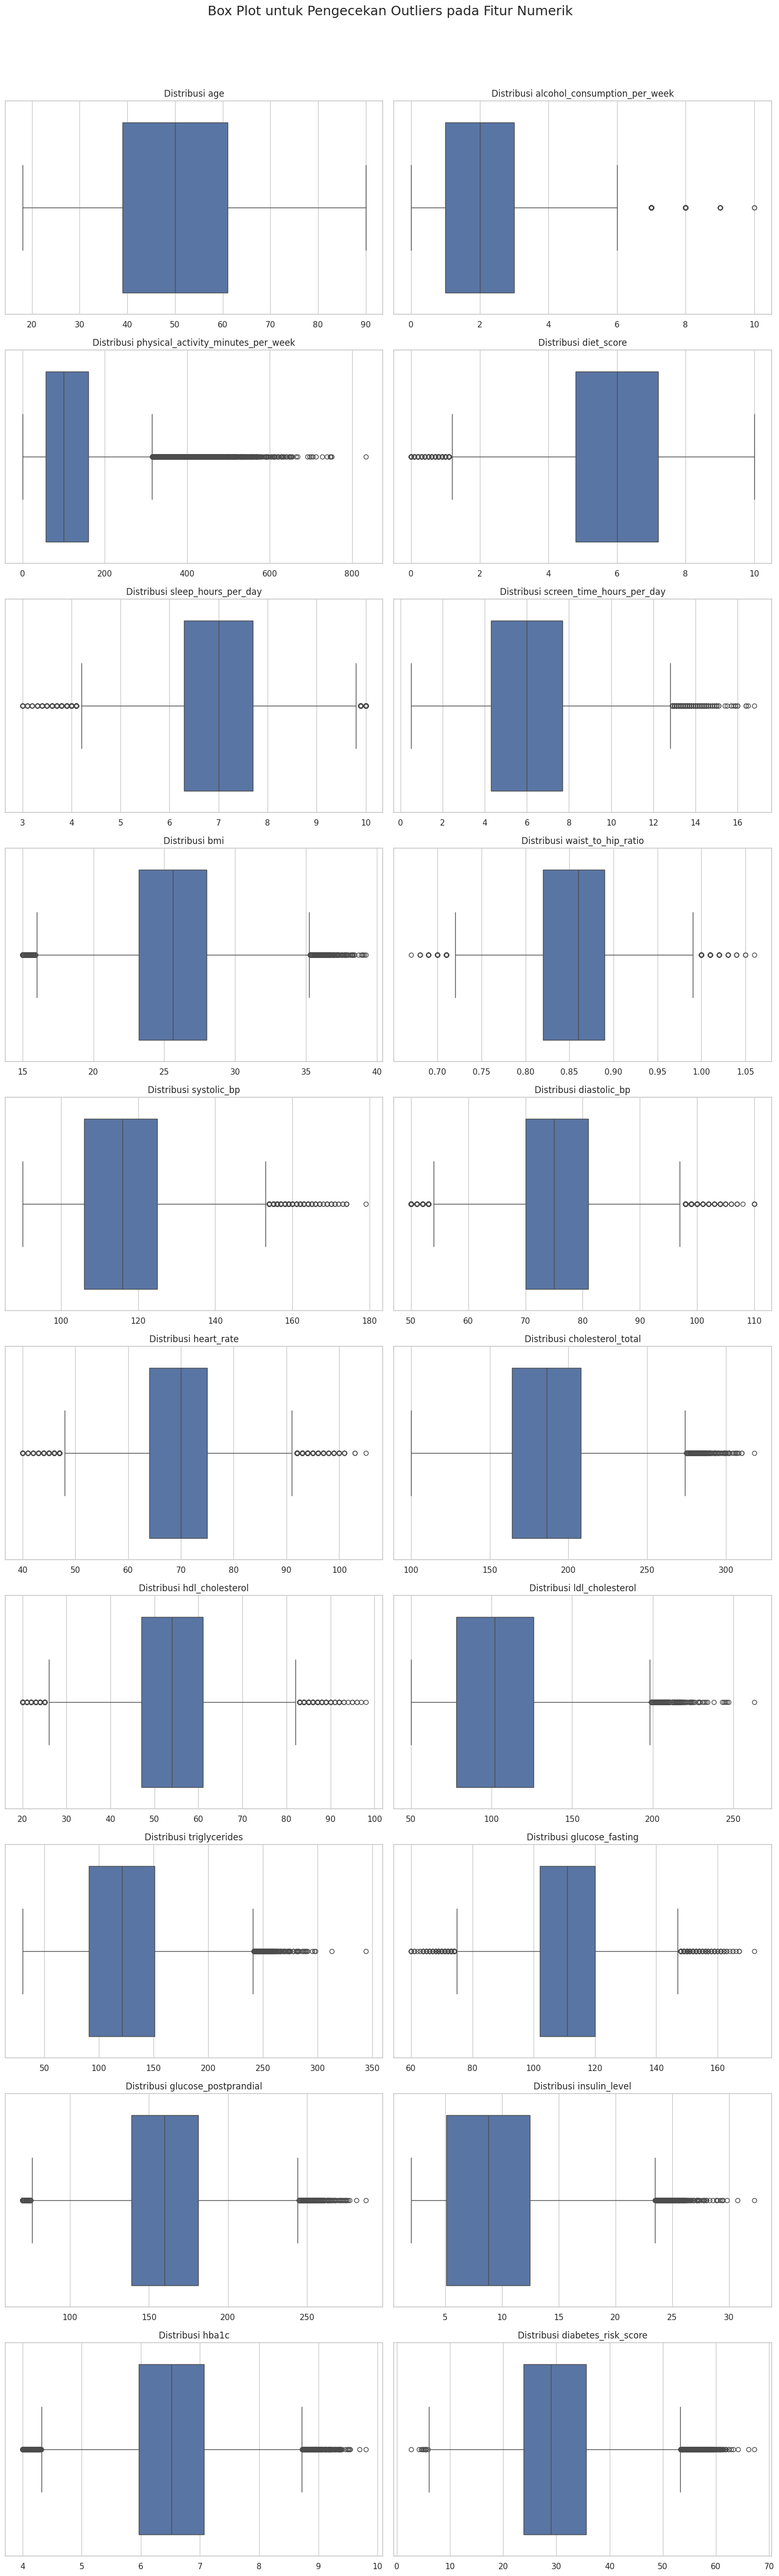

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

numerical_cols = [
  'age',
  'alcohol_consumption_per_week',
  'physical_activity_minutes_per_week',
  'diet_score',
  'sleep_hours_per_day',
  'screen_time_hours_per_day',
  'bmi',
  'waist_to_hip_ratio',
  'systolic_bp',
  'diastolic_bp',
  'heart_rate',
  'cholesterol_total',
  'hdl_cholesterol',
  'ldl_cholesterol',
  'triglycerides',
  'glucose_fasting',
  'glucose_postprandial',
  'insulin_level',
  'hba1c',
  'diabetes_risk_score'
]

num_of_cols = len(numerical_cols)
plot_cols = 2
plot_rows = math.ceil(num_of_cols / plot_cols)

sns.set(style="whitegrid")
plt.figure(figsize=(15, 5 * plot_rows))
plt.suptitle('Box Plot untuk Pengecekan Outliers pada Fitur Numerik', fontsize=18, y=0.98)

for i, col in enumerate(numerical_cols, 1):
  plt.subplot(plot_rows, plot_cols, i)
  sns.boxplot(x=df[col])
  plt.title(f'Distribusi {col}', fontsize=12)
  plt.xlabel('')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
print("Jumlah dan Persentase Outliers Berdasarkan Metode IQR:")
for col in numerical_cols:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  num_outliers = len(outliers)

  total_data = len(df)
  percentage = (num_outliers / total_data) * 100

  if num_outliers > 0:
    print(f"- {col}: {num_outliers} data ({percentage:.2f}%)")

Jumlah dan Persentase Outliers Berdasarkan Metode IQR:
- alcohol_consumption_per_week: 458 data (0.46%)
- physical_activity_minutes_per_week: 3199 data (3.20%)
- diet_score: 337 data (0.34%)
- sleep_hours_per_day: 900 data (0.90%)
- screen_time_hours_per_day: 305 data (0.30%)
- bmi: 744 data (0.74%)
- waist_to_hip_ratio: 273 data (0.27%)
- systolic_bp: 530 data (0.53%)
- diastolic_bp: 731 data (0.73%)
- heart_rate: 855 data (0.85%)
- cholesterol_total: 309 data (0.31%)
- hdl_cholesterol: 565 data (0.56%)
- ldl_cholesterol: 349 data (0.35%)
- triglycerides: 301 data (0.30%)
- glucose_fasting: 745 data (0.74%)
- glucose_postprandial: 634 data (0.63%)
- insulin_level: 326 data (0.33%)
- hba1c: 618 data (0.62%)
- diabetes_risk_score: 914 data (0.91%)


## Distribusi Data

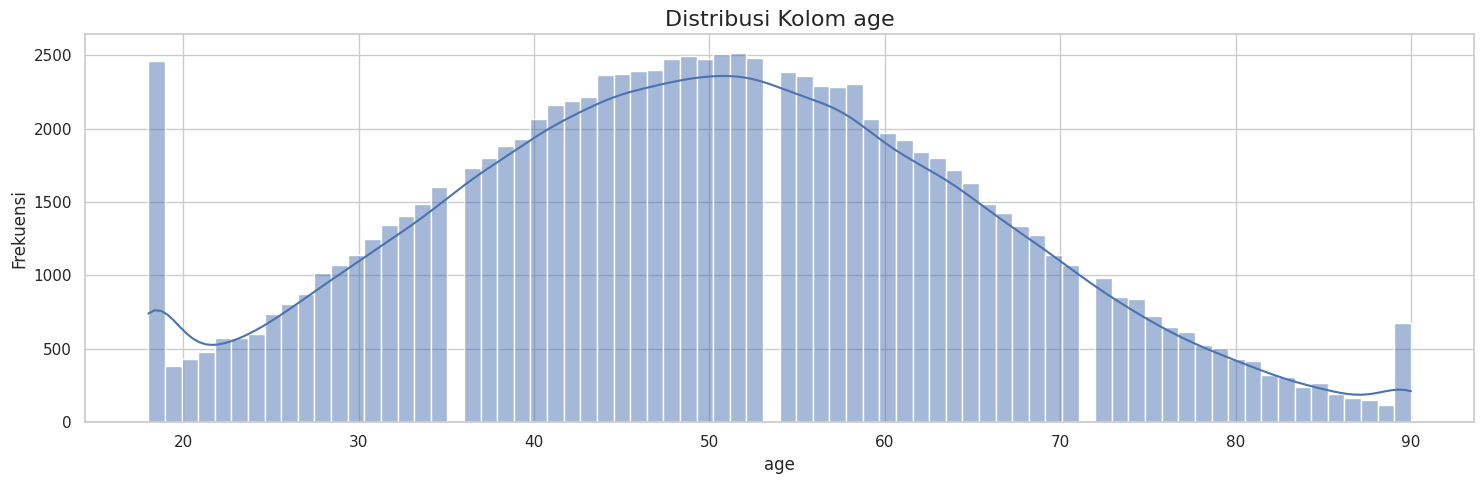

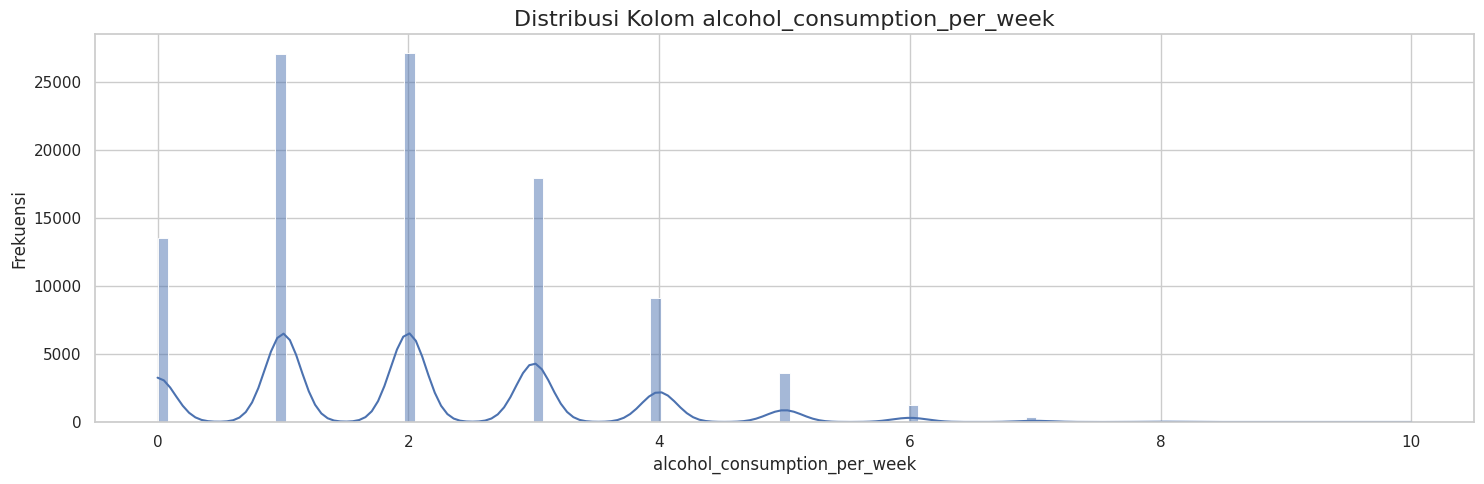

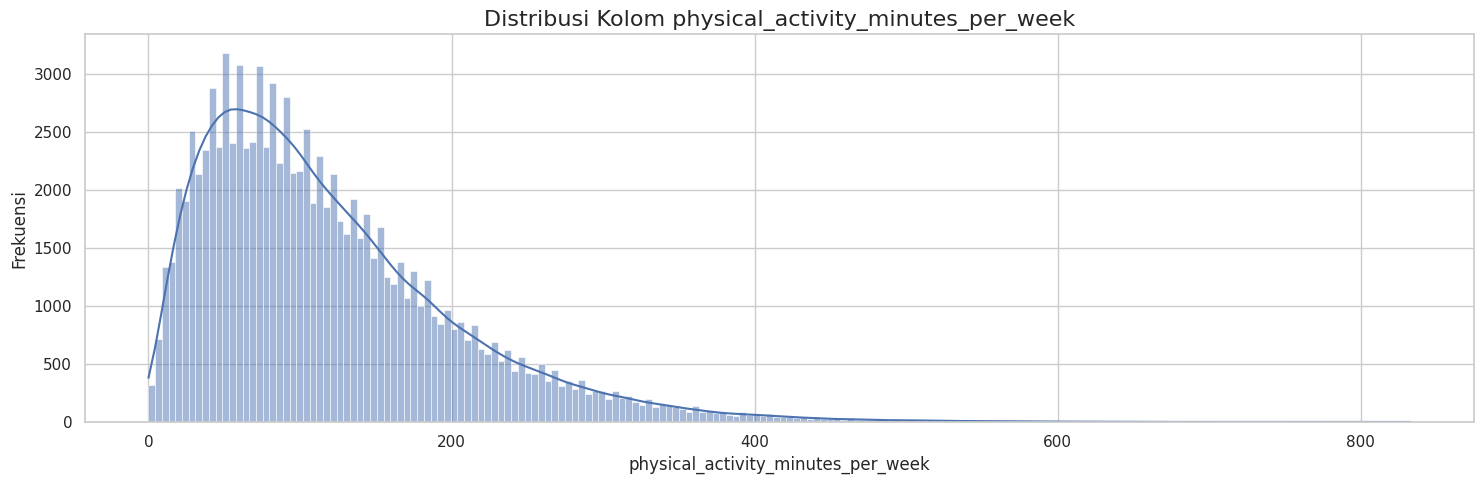

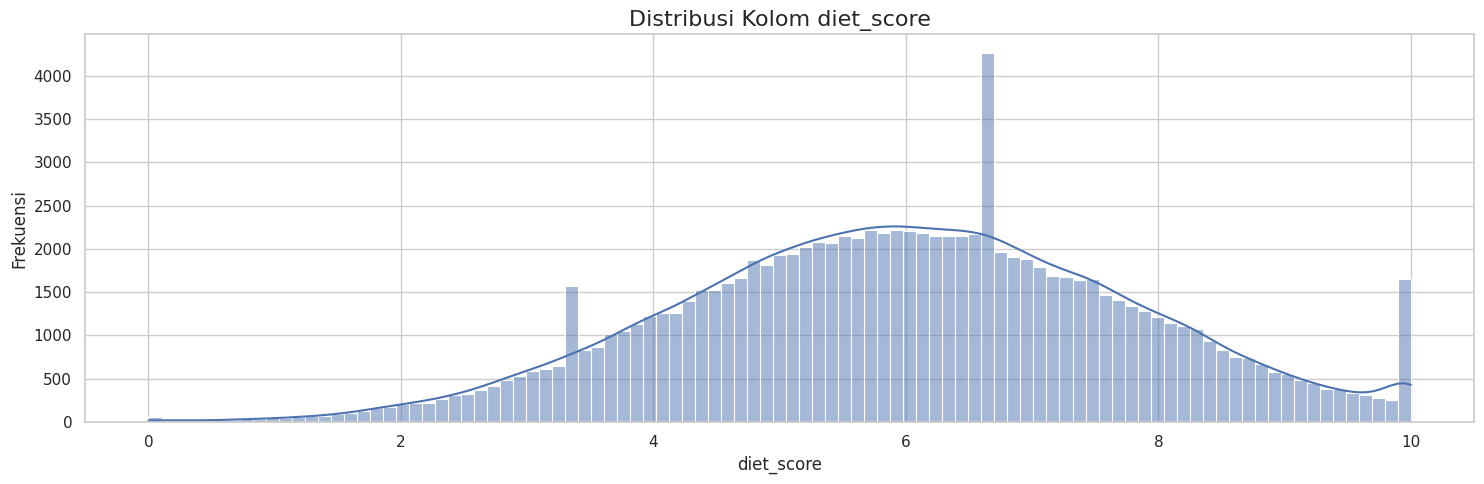

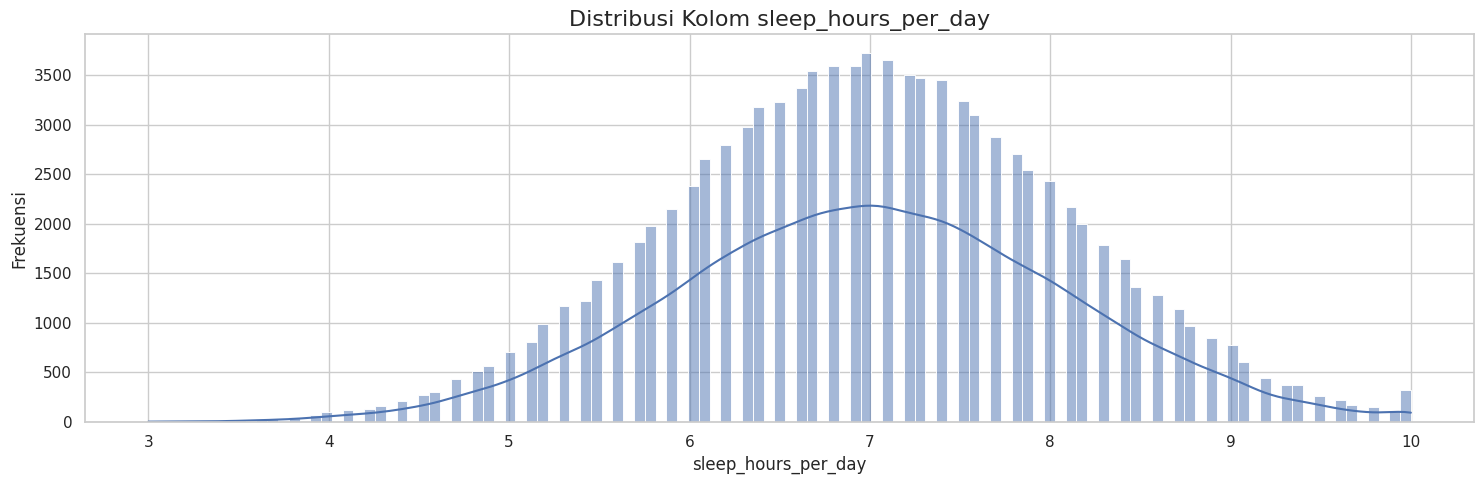

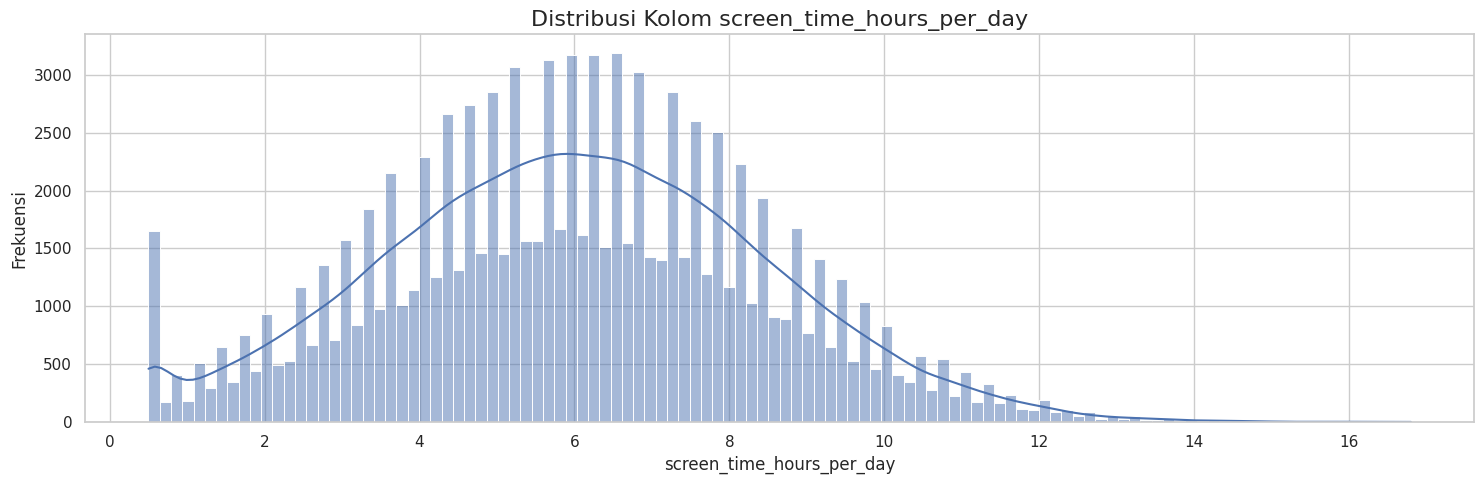

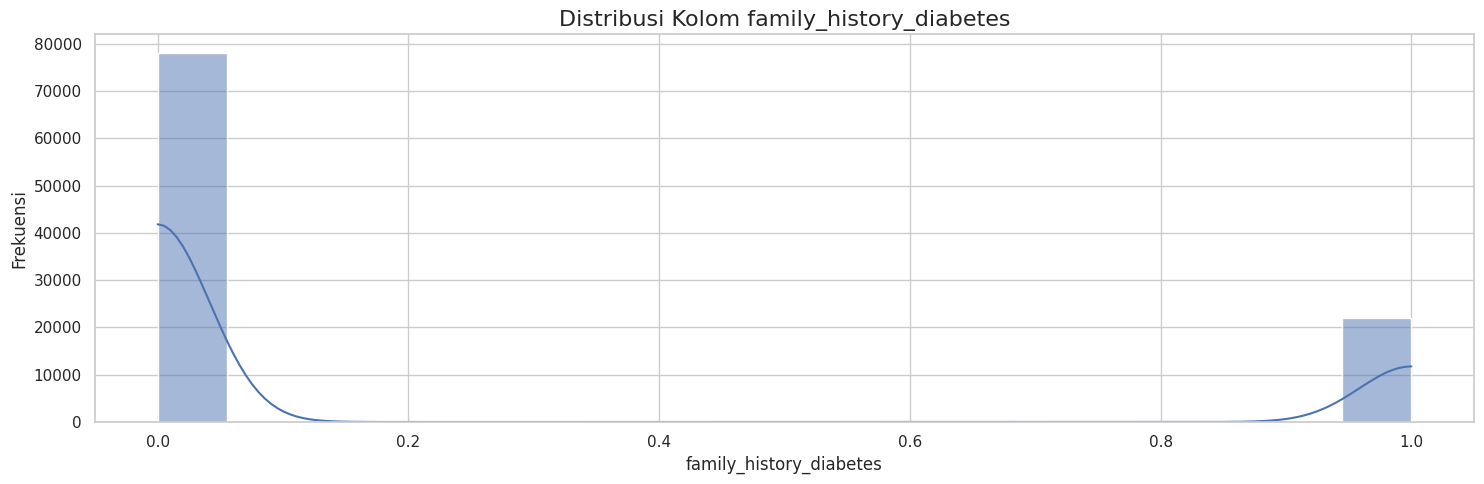

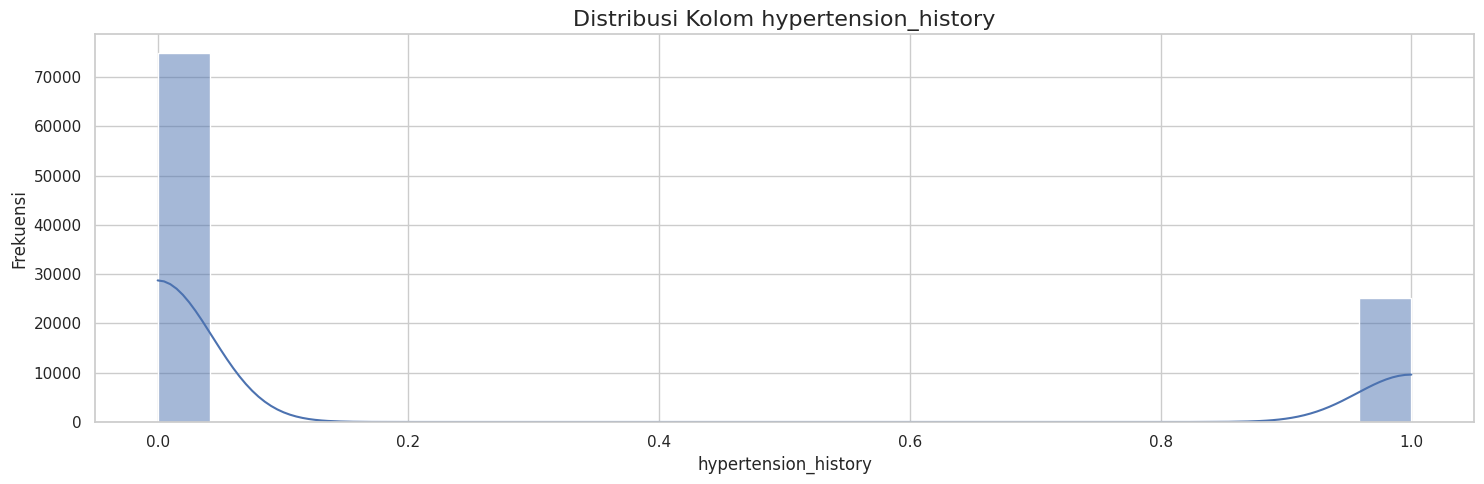

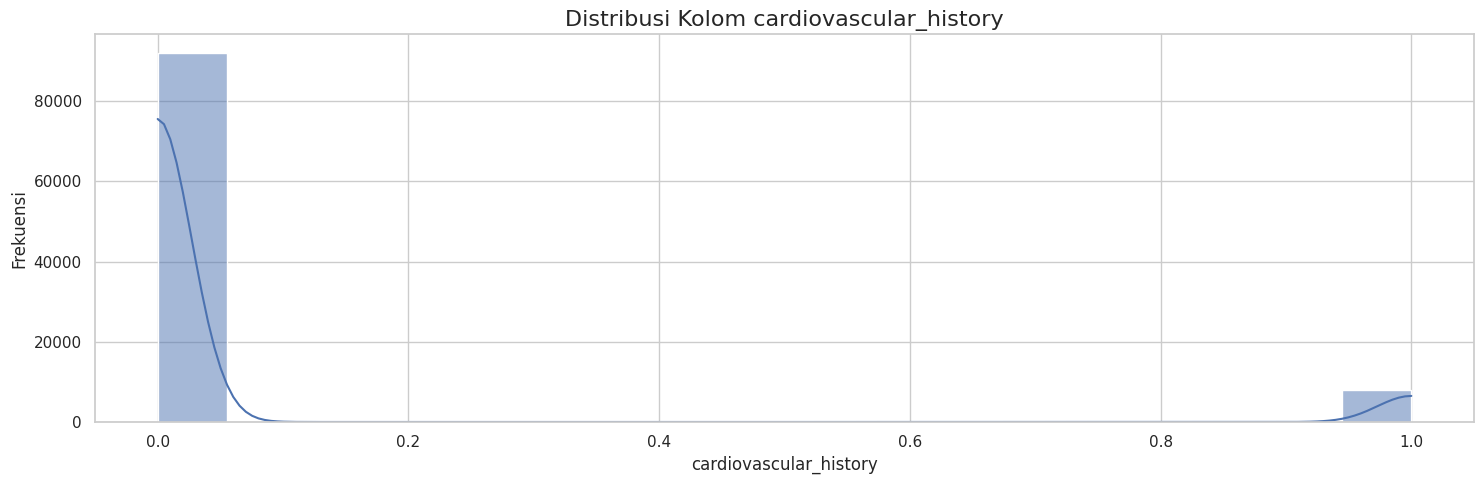

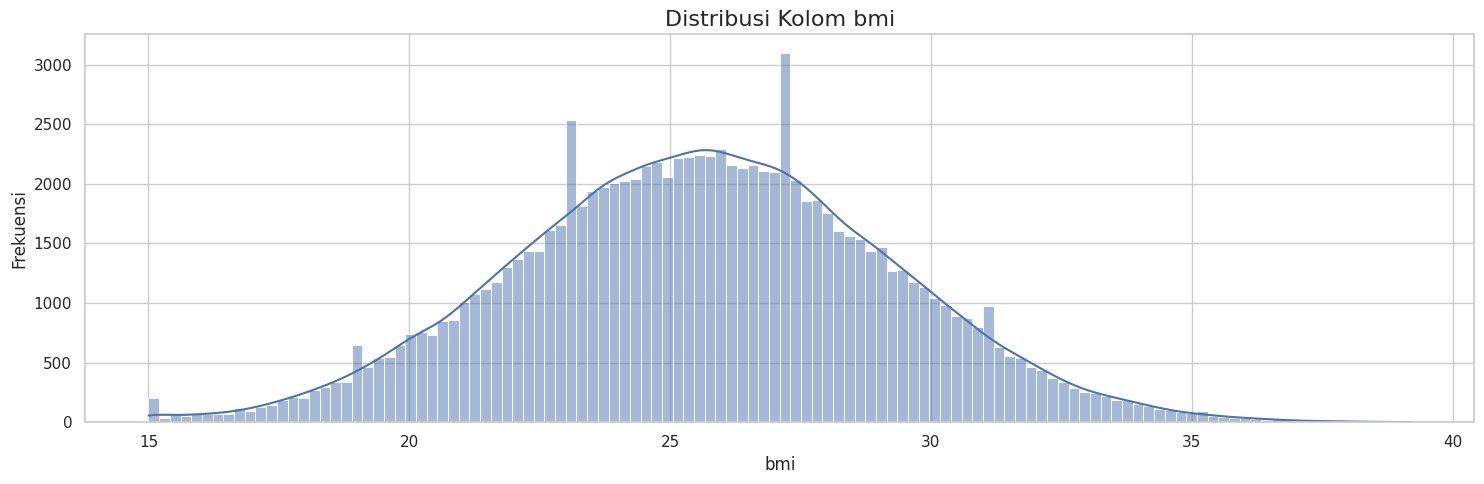

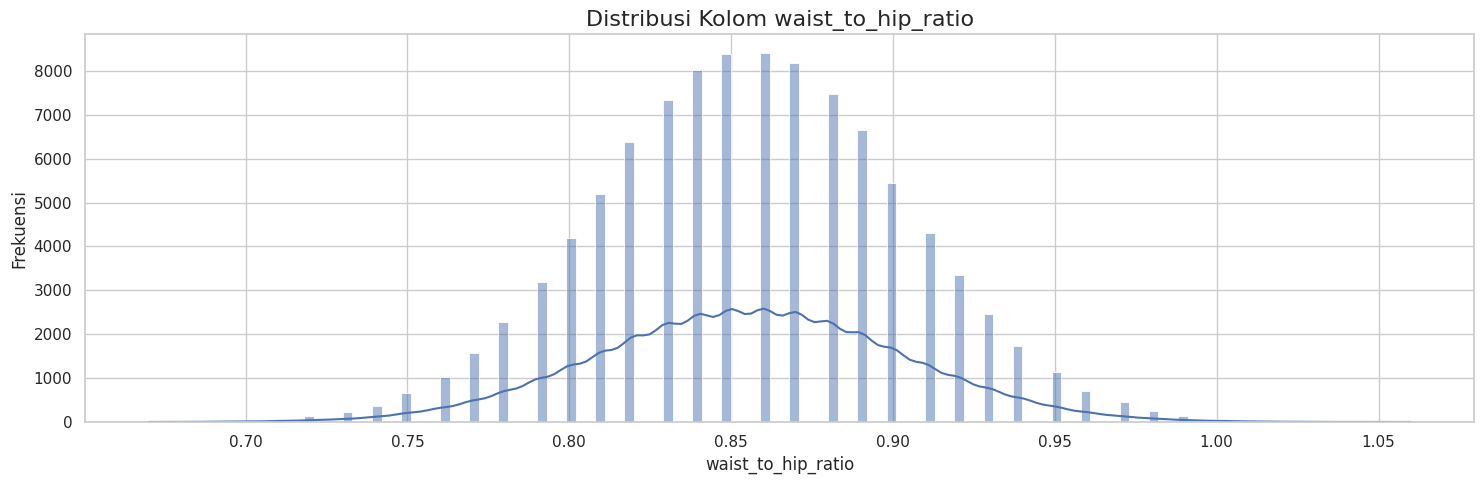

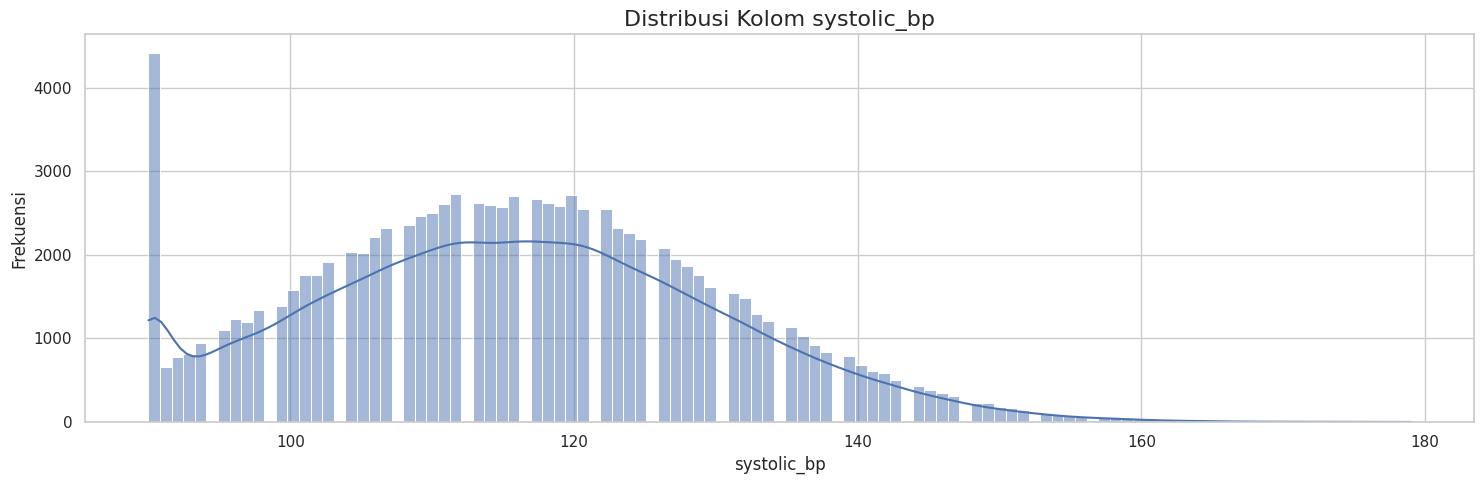

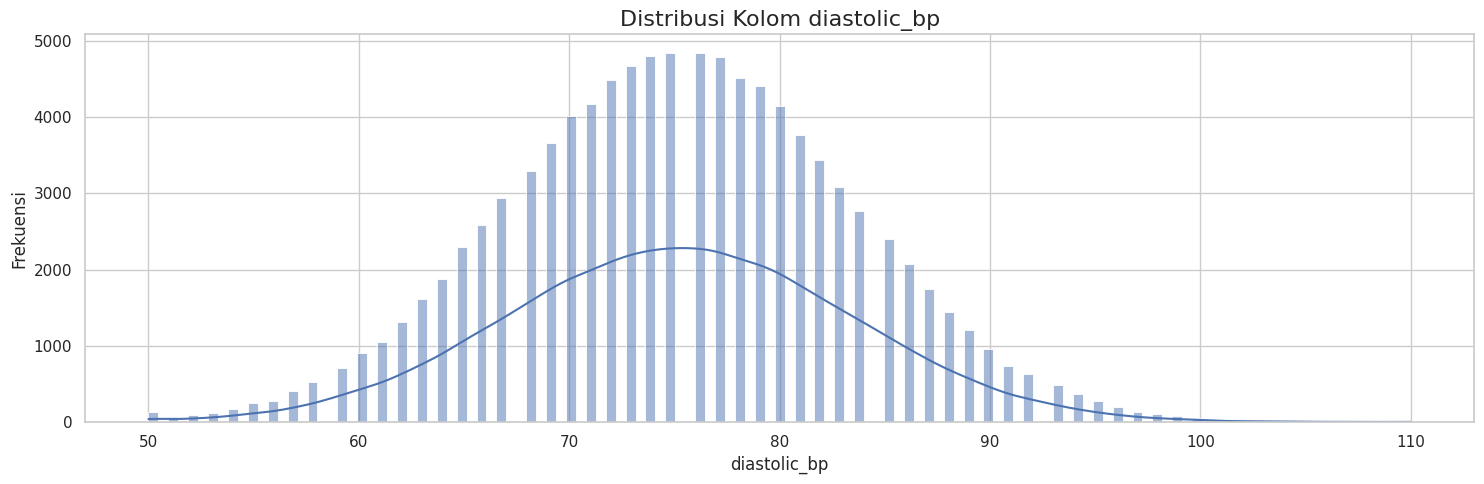

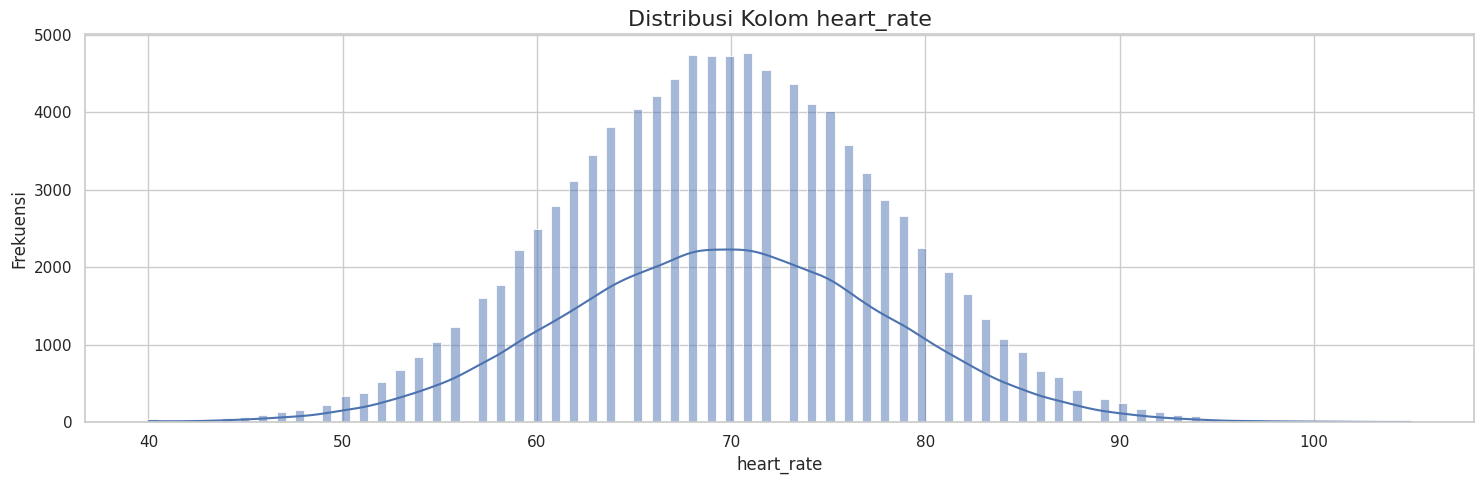

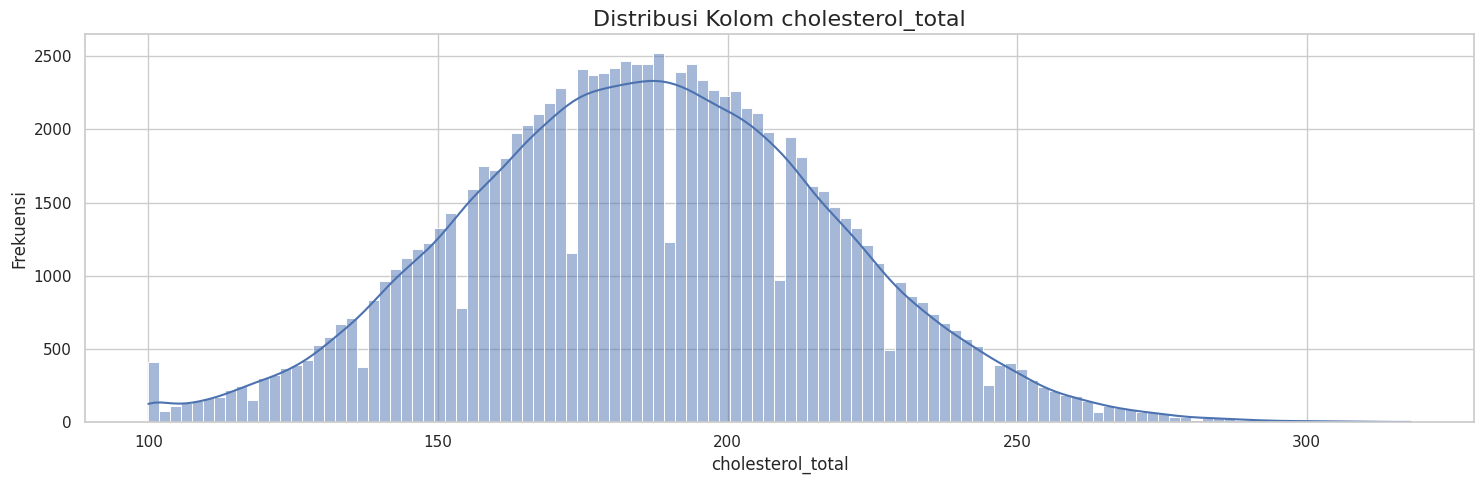

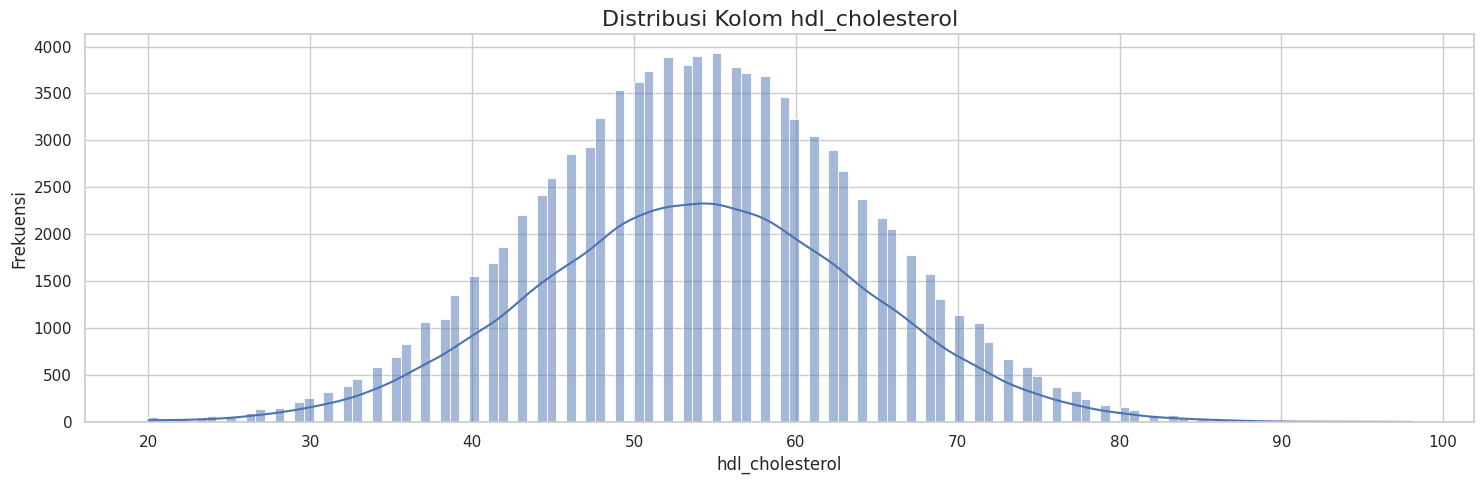

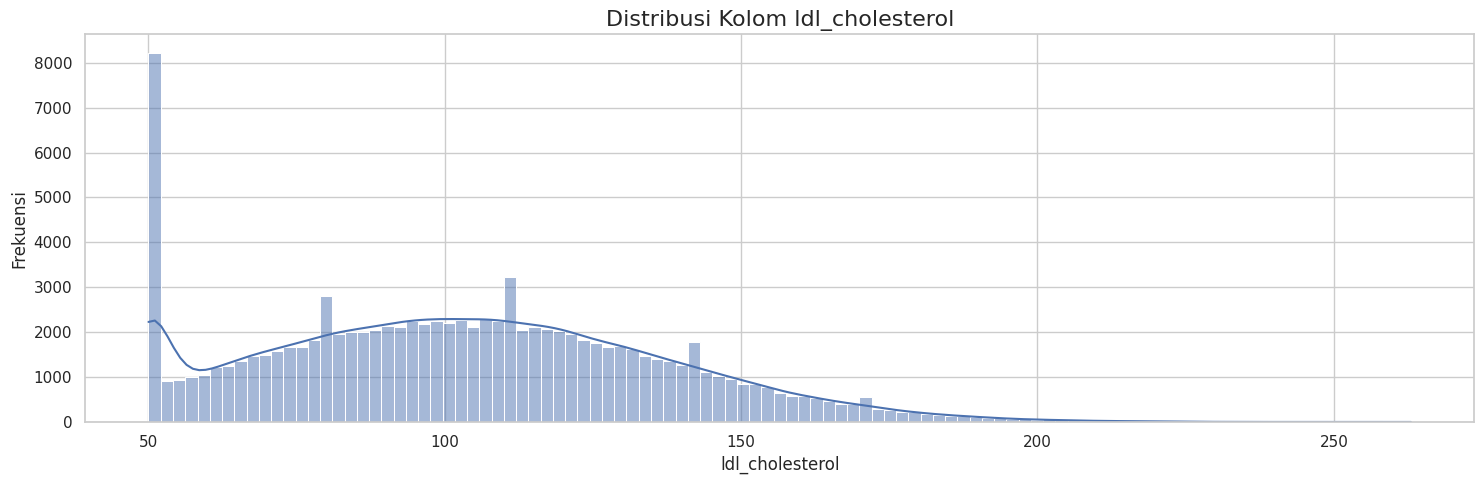

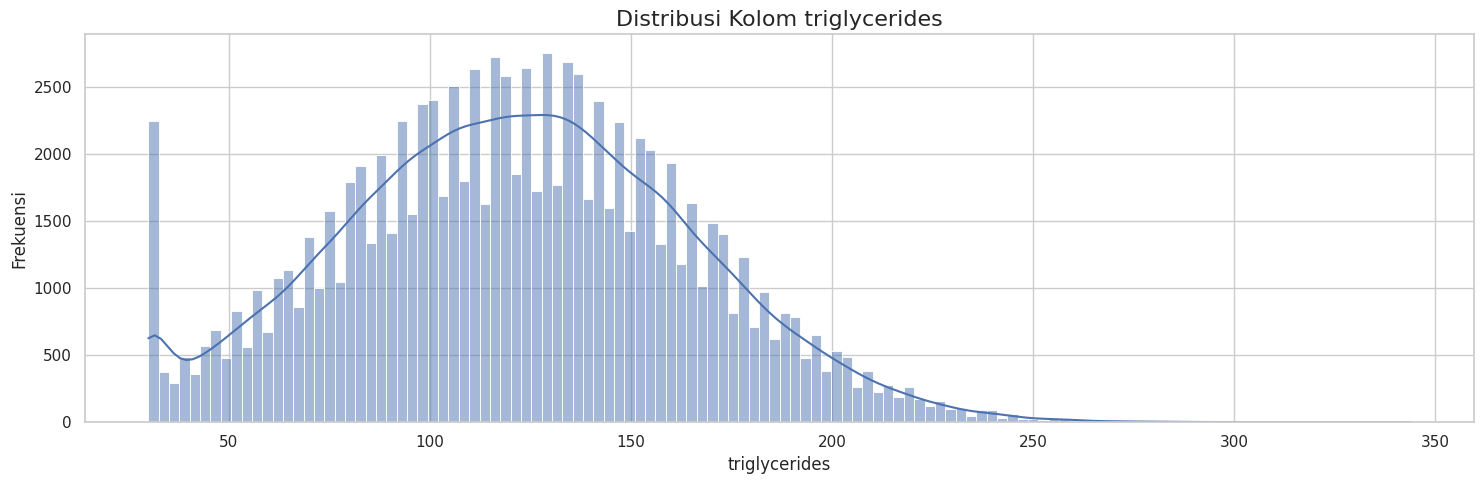

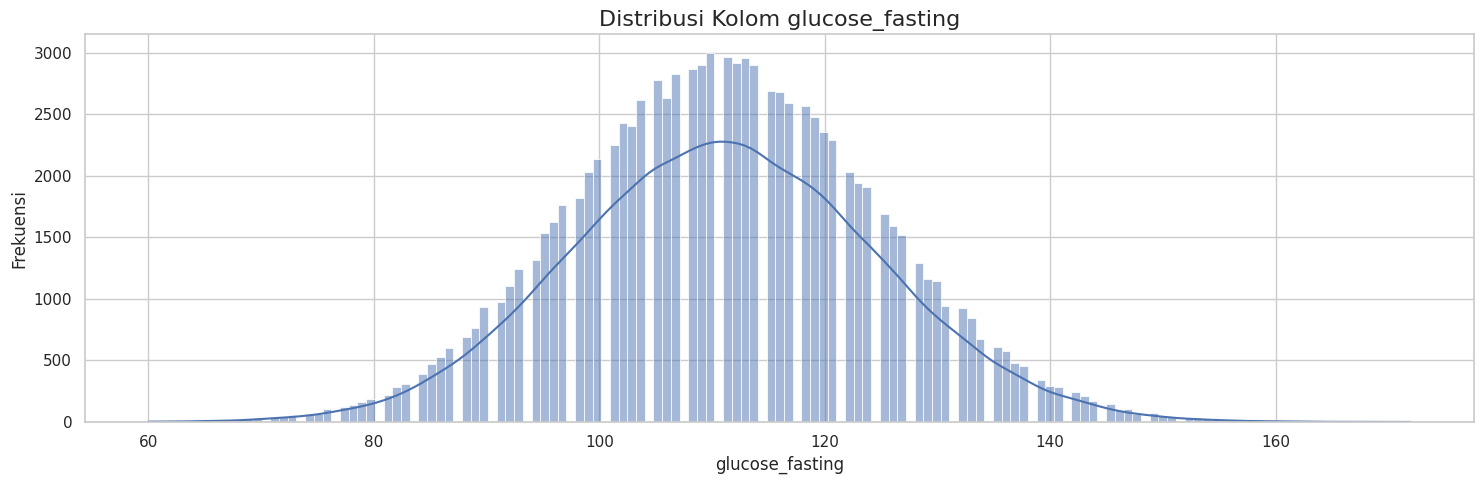

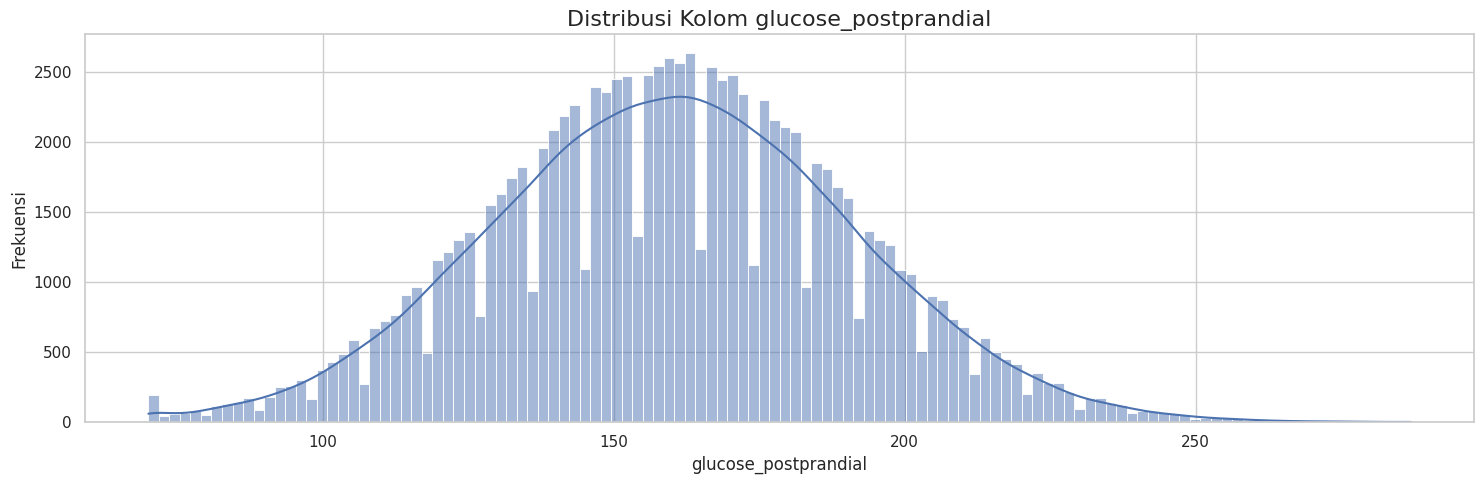

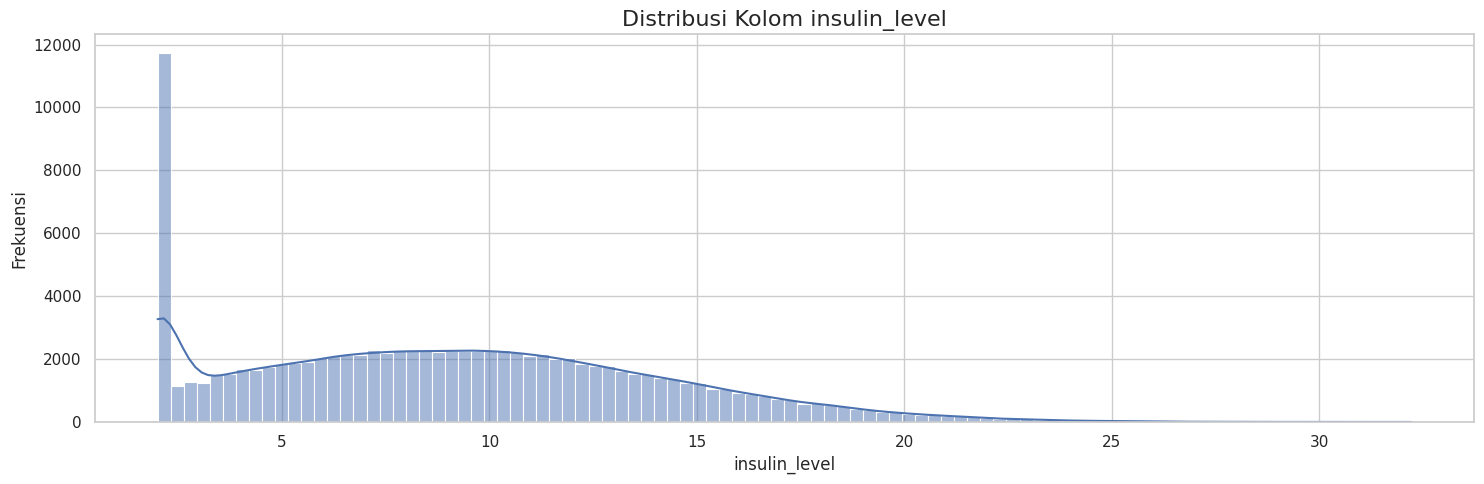

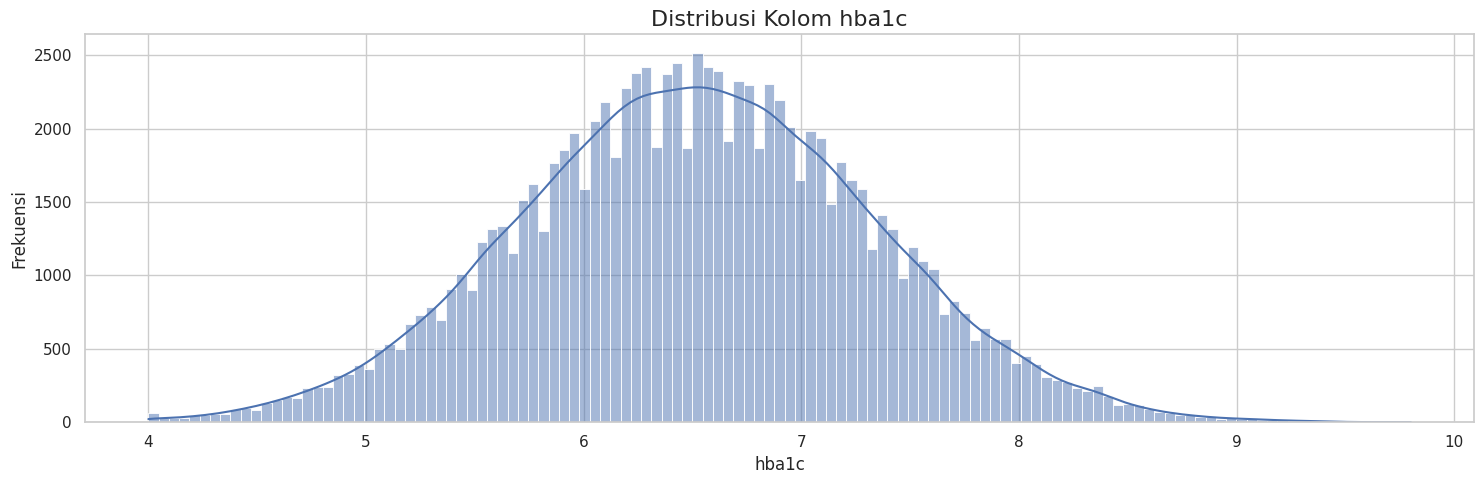

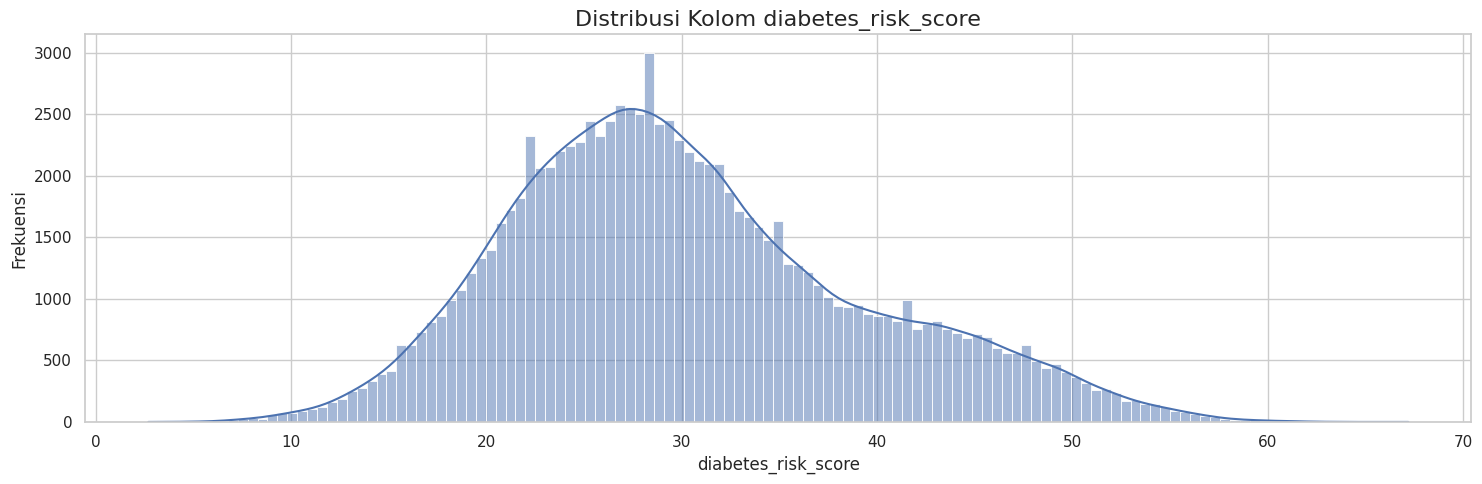

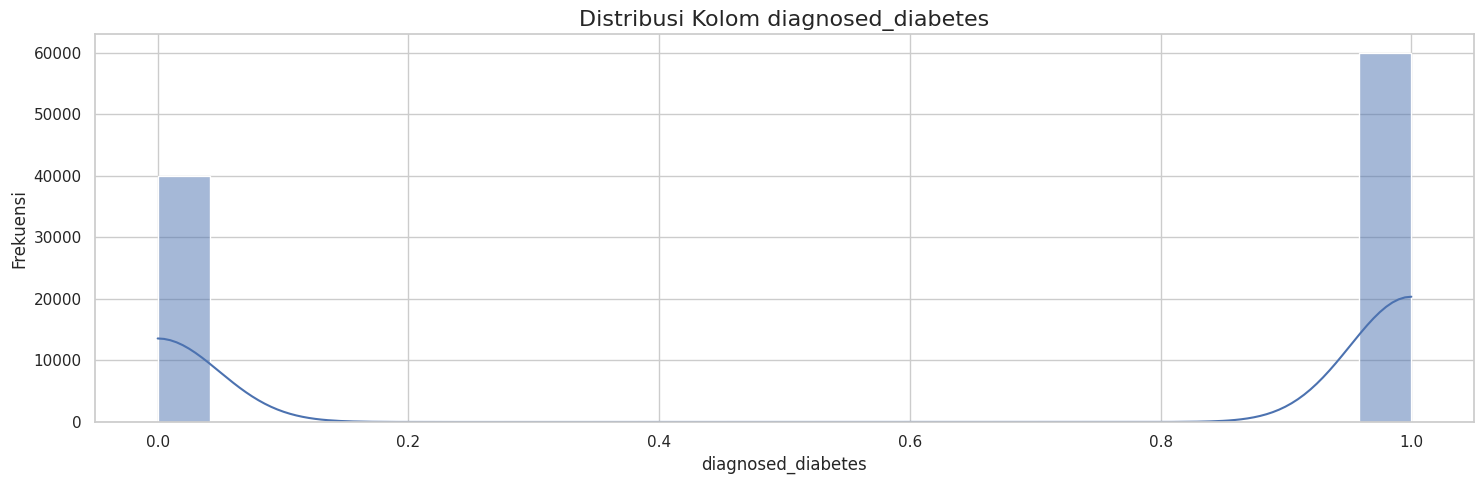

In [ ]:
numerical_cols_all = df.select_dtypes(include='number')
sns.set(style="whitegrid")
for column in numerical_cols_all:
  plt.figure(figsize=(15, 5))

  sns.histplot(df[column], kde=True)
  plt.title(f'Distribusi Kolom {column}', fontsize=16)
  plt.xlabel(column)
  plt.ylabel('Frekuensi')

  plt.tight_layout()
  plt.show()

## Korelasi Antar Fitur

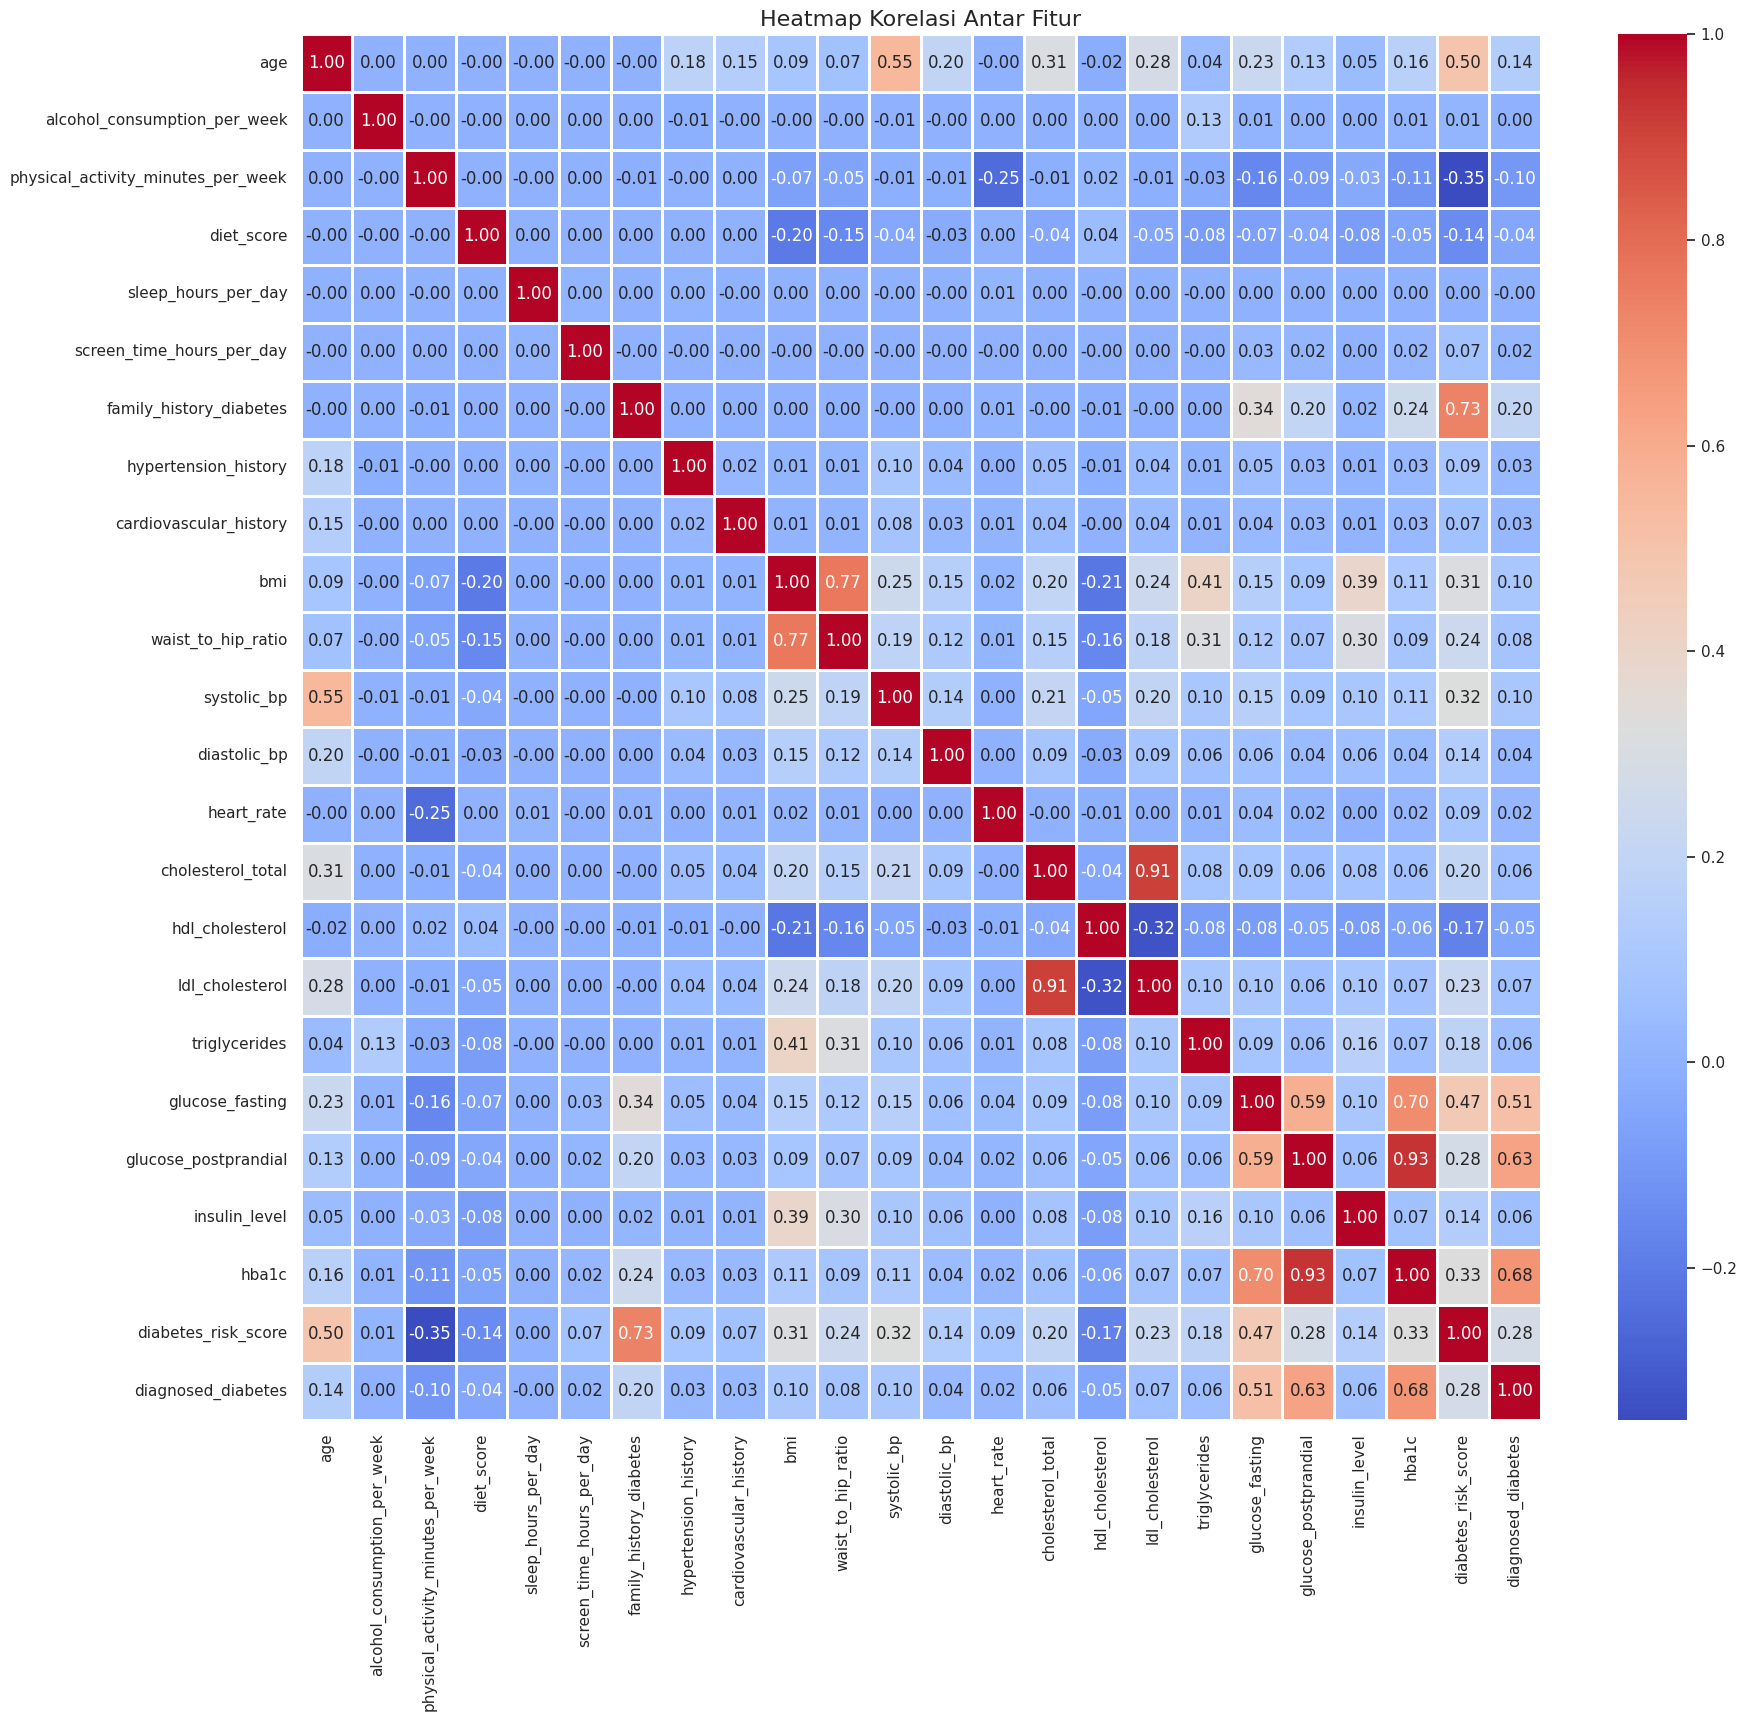

In [ ]:
correlation_matrix = numerical_cols_all.corr()
plt.figure(figsize=(20, 18))
sns.heatmap(
  correlation_matrix,
  annot=True,
  cmap='coolwarm',
  fmt='.2f',
  linewidths=1
)
plt.title('Heatmap Korelasi Antar Fitur', fontsize=16)
plt.show()

# Data Preparation

## Encoding Fitur Kategori

In [ ]:
df_encoded = df.copy()

cols_onehot = ['gender', 'ethnicity', 'employment_status', 'smoking_status']
df_encoded = pd.get_dummies(df_encoded, columns=cols_onehot, drop_first=True)

education_map = {
  'No formal': 0,
  'Highschool': 1,
  'Postgraduate': 2,
  'Graduate': 3
}
income_map = {
  'Low': 0,
  'Lower-Middle': 1,
  'Middle': 2,
  'Upper-Middle': 3,
  'High': 4
}
diabetes_stage_map = {
  'No Diabetes': 'No Diabetes',
  'Pre-Diabetes': 'Pre-Diabetes',
  'Type 1': 'Pre-Diabetes',
  'Type 2': 'Diabetes',
  'Gestational': 'Diabetes'
}

df_encoded['education_level'] = df_encoded['education_level'].map(education_map)
df_encoded['income_level'] = df_encoded['income_level'].map(income_map)
df_encoded['diabetes_stage'] = df_encoded['diabetes_stage'].map(diabetes_stage_map)

le = LabelEncoder()
df_encoded['diabetes_stage'] = le.fit_transform(df_encoded['diabetes_stage'])

## Pembagian Dataset

In [ ]:
X = df_encoded.drop(['diabetes_risk_score', 'diabetes_stage', 'diagnosed_diabetes'], axis=1)
y = df_encoded['diabetes_stage']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(f'Total of sample in whole dataset: {len(X)}')
print(f'Total of sample in train dataset: {len(X_train)}')
print(f'Total of sample in test dataset: {len(X_test)}')

Total of sample in whole dataset: 100000
Total of sample in train dataset: 80000
Total of sample in test dataset: 20000


## Standarisasi

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Development

## K-Nearest Neighbors

In [ ]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train_scaled, y_train)
y_pred_knn = model_knn.predict(X_test_scaled)

## Logistic Regression

In [ ]:
model_lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model_lr.fit(X_train_scaled, y_train)
y_pred_lr = model_lr.predict(X_test_scaled)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


## XGBoost Classifier

In [ ]:
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model_xgb.fit(X_train_scaled, y_train)
y_pred_xgb = model_xgb.predict(X_test_scaled)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:39:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


## LightGBM Classifier

In [ ]:
model_lgb = LGBMClassifier()
model_lgb.fit(X_train_scaled, y_train)
y_pred_lgb = model_lgb.predict(X_test_scaled)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016393 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2730
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 35
[LightGBM] [Info] Start training from score -0.508412
[LightGBM] [Info] Start training from score -2.522609
[LightGBM] [Info] Start training from score -1.144761


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


## Evaluasi Model

===================== K-Nearest Neighbors =====================

Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.79      0.84      0.81     11936
Pre-Diabetes       0.61      0.42      0.50      1561
    Diabetes       0.60      0.57      0.59      6503

    accuracy                           0.72     20000
   macro avg       0.67      0.61      0.63     20000
weighted avg       0.71      0.72      0.71     20000


Confusion Matrix:


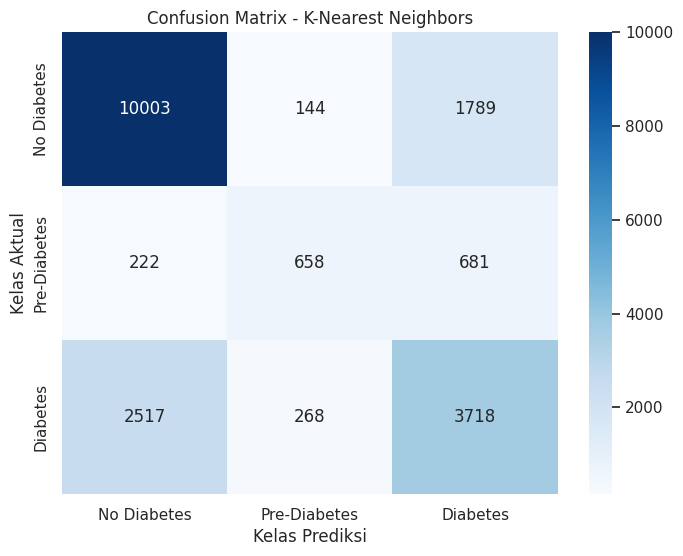



===================== Logistic Regression =====================

Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.86      0.89      0.88     11936
Pre-Diabetes       0.80      0.68      0.73      1561
    Diabetes       0.75      0.73      0.74      6503

    accuracy                           0.82     20000
   macro avg       0.80      0.77      0.78     20000
weighted avg       0.82      0.82      0.82     20000


Confusion Matrix:


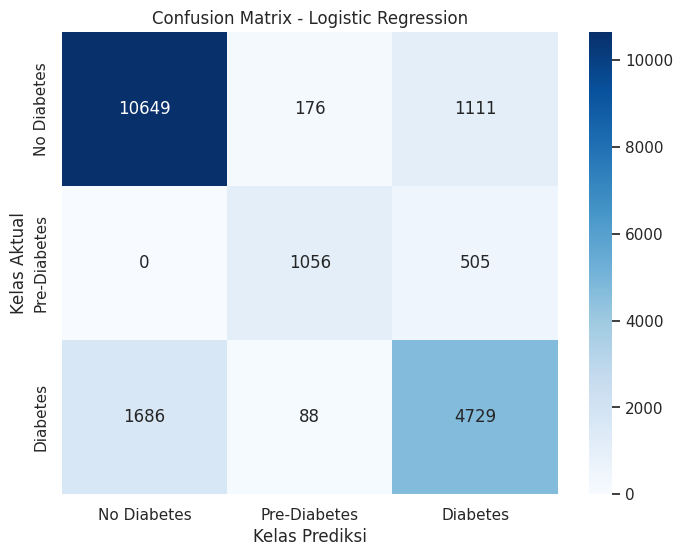



===================== XGBoost Classifier =====================

Classification Report:
              precision    recall  f1-score   support

 No Diabetes       1.00      0.86      0.93     11936
Pre-Diabetes       0.86      0.99      0.92      1561
    Diabetes       0.83      0.99      0.90      6503

    accuracy                           0.92     20000
   macro avg       0.89      0.95      0.92     20000
weighted avg       0.93      0.92      0.92     20000


Confusion Matrix:


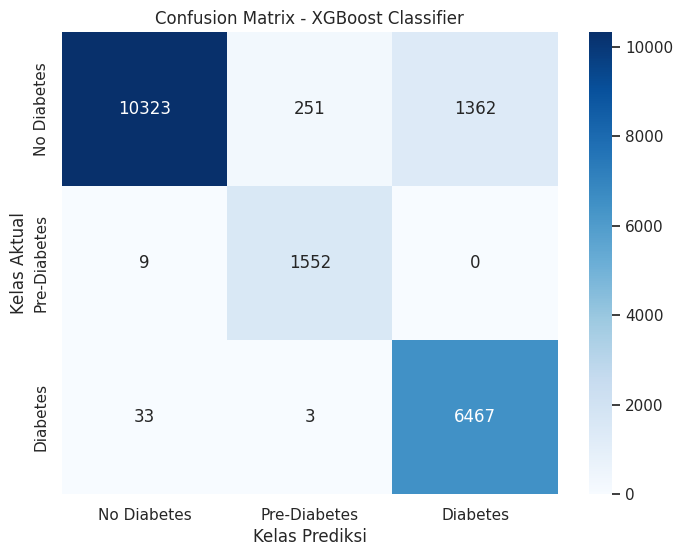



===================== LightGBM Classifier =====================

Classification Report:
              precision    recall  f1-score   support

 No Diabetes       1.00      0.86      0.93     11936
Pre-Diabetes       0.86      1.00      0.92      1561
    Diabetes       0.83      1.00      0.90      6503

    accuracy                           0.92     20000
   macro avg       0.89      0.95      0.92     20000
weighted avg       0.93      0.92      0.92     20000


Confusion Matrix:


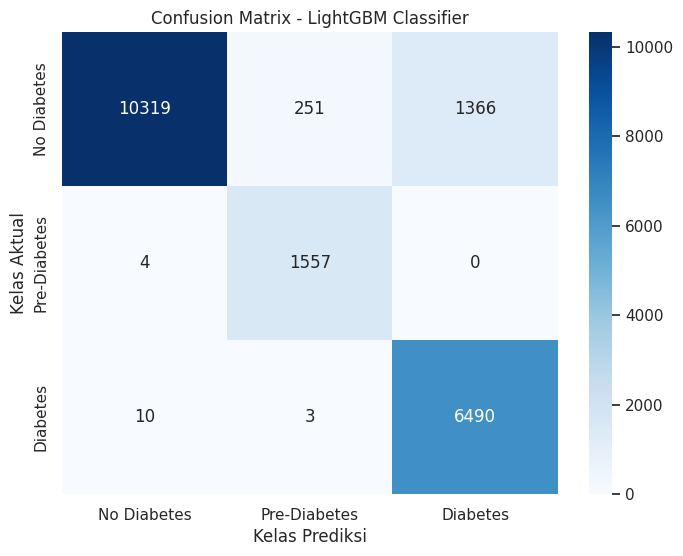

In [ ]:
all_predictions = {
    "K-Nearest Neighbors": y_pred_knn,
    "Logistic Regression": y_pred_lr,
    "XGBoost Classifier": y_pred_xgb,
    "LightGBM Classifier": y_pred_lgb
}

class_names = ['No Diabetes', 'Pre-Diabetes', 'Diabetes']
class_indices = [str(i) for i in range(len(class_names))]

for model_name, y_pred in all_predictions.items():
  print(f"===================== {model_name} =====================")

  print("\nClassification Report:")
  print(classification_report(y_test, y_pred, target_names=class_names))

  print("\nConfusion Matrix:")
  cm = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
  plt.title(f'Confusion Matrix - {model_name}')
  plt.ylabel('Kelas Aktual')
  plt.xlabel('Kelas Prediksi')
  plt.show()

  print("\n")

In [ ]:
accuracy_scores = []
for model_name, y_pred in all_predictions.items():
  accuracy = accuracy_score(y_test, y_pred)
  accuracy_scores.append({'Model': model_name, 'Accuracy': accuracy})

accuracy_df = pd.DataFrame(accuracy_scores)
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
accuracy_df.index += 1
accuracy_df = accuracy_df.set_index('Model')

display(accuracy_df.style.format({'Accuracy': '{:.2%}'}))

,Accuracy
Model,
LightGBM Classifier,91.83%
XGBoost Classifier,91.71%
Logistic Regression,82.17%
K-Nearest Neighbors,71.89%


## Hyperparameter Tuning untuk LightGBM

In [ ]:
lgbm = lgb.LGBMClassifier(random_state=42)

param_grid = {
  'n_estimators': [100, 200, 500],
  'learning_rate': [0.01, 0.05, 0.1],
  'max_depth': [3, 5, 7],
  'num_leaves': [15, 31, 63],
}

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
  estimator=lgbm,
  param_grid=param_grid,
  scoring='f1_weighted',
  cv=cv_strategy,
  n_jobs=-1,
  verbose=2
)

grid_search.fit(X_train_scaled, y_train)

print("\nHyperparameter terbaik yang ditemukan:")
print(grid_search.best_params_)

print("\nSkor F1 (Weighted) Cross-Validation terbaik:")
print(f"{grid_search.best_score_:.4f}")

best_lgbm_model = grid_search.best_estimator_

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.036398 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2730
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 35
[LightGBM] [Info] Start training from score -0.508412
[LightGBM] [Info] Start training from score -2.522609
[LightGBM] [Info] Start training from score -1.144761
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

Hyperparameter terbaik yang ditemukan:
{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'num_leaves': 15}

Skor F1 (Weighted) Cross-Validation terbaik:
0.9205


/tmp/ipython-input-2799181033.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')


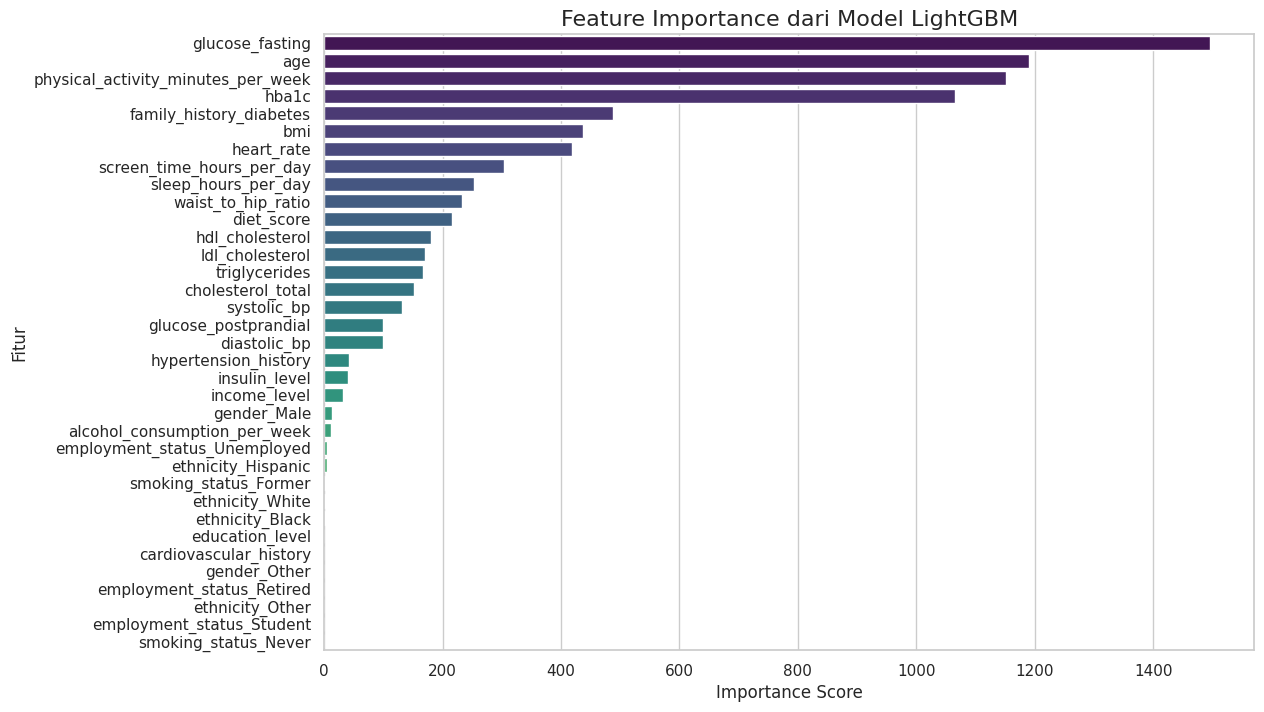

In [ ]:
feature_importances = best_lgbm_model.feature_importances_

feature_df = pd.DataFrame({
  'Feature': X.columns,
  'Importance': feature_importances
})

feature_df = feature_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')
plt.title('Feature Importance dari Model LightGBM', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Fitur', fontsize=12)
plt.show()

## Evaluasi Model LightGBM Pada Test Set

In [ ]:
final_predictions = best_lgbm_model.predict(X_test_scaled)

print("Laporan Klasifikasi Final pada Data Uji:")
print(classification_report(y_test, final_predictions, target_names=class_names))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Laporan Klasifikasi Final pada Data Uji:
              precision    recall  f1-score   support

 No Diabetes       1.00      0.86      0.93     11936
Pre-Diabetes       0.86      1.00      0.92      1561
    Diabetes       0.83      1.00      0.90      6503

    accuracy                           0.92     20000
   macro avg       0.89      0.95      0.92     20000
weighted avg       0.93      0.92      0.92     20000

